# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [38]:
import pandas as pd

In [39]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [40]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [41]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [42]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [43]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [44]:
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,세대당인구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,71890,78563,150453,1.93,215,"5,912","3,613","1,413",...,356,105,4500874,4348356,123.298104,119.119987,59.819645,44.694476,26504649,19803049.50
1,11020,중구,63495,68298,131793,1.87,235,"6,414","3,542",982,...,173,102,3138112,3050645,113.699710,110.530616,58.197800,47.183639,26065980,21132891.17
2,11030,용산구,109826,117280,227106,1.98,523,"2,987","2,076","1,332",...,326,69,3495720,3422432,119.962938,117.447907,57.995736,36.418986,23776976,14930983.13
3,11040,성동구,137620,147146,284766,2.08,"2,527","2,785","1,859",621,...,432,58,2371151,2331836,90.495039,88.994581,58.184820,41.879404,24144722,17378528.65
4,11050,광진구,167562,183618,351180,1.97,"1,744","2,861","1,887","1,577",...,274,43,2365355,2382437,107.491706,108.267985,60.890991,45.669953,23556776,17668243.56


In [45]:
df['일반 교과 학원.1'] = df['일반 교과 학원.1'].str.replace(',', '').astype(int)

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 학원가에는 정류장 수가 많을 것이다.

* 가설 2 : 세대 당 인구수와 승차 승객 수는 관계가 있다. 

* 가설 3 : 인구 대비 이동 인구의 비율과 노선 수는 관계가 있다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [46]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1) 노선 수


In [47]:
df['노선수'].describe()

count     25.000000
mean      74.480000
std       23.331167
min       22.000000
25%       57.000000
50%       74.000000
75%       98.000000
max      109.000000
Name: 노선수, dtype: float64

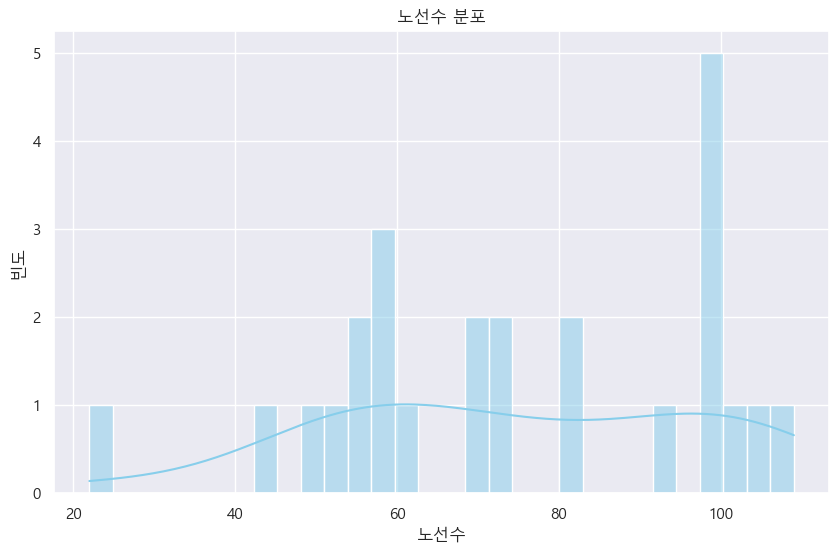

In [48]:
# 총 이동인구 변수의 분포를 히스토그램과 KDE 그래프로 나타내기
plt.figure(figsize=(10, 6))
sns.histplot(df['노선수'], bins=30, kde=True, color='skyblue')
plt.title('노선수 분포')
plt.xlabel('노선수')
plt.ylabel('빈도')
plt.grid(True)
plt.show()


In [49]:
df[df['노선수']<40]

,도착 시군구 코드,자치구,남자,여자,합계,세대당인구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
24,11250,강동구,226237,237081,463318,2.25,"4,980","3,388","1,660","1,349",...,367,22,2515582,2460905,91.578944,89.588445,71.16435,67.258181,23738648,22435647.77


### 2) 정류장 수

In [50]:
df['정류장수'].describe()

count     25.000000
mean     426.080000
std      105.022982
min      173.000000
25%      356.000000
50%      435.000000
75%      495.000000
max      601.000000
Name: 정류장수, dtype: float64

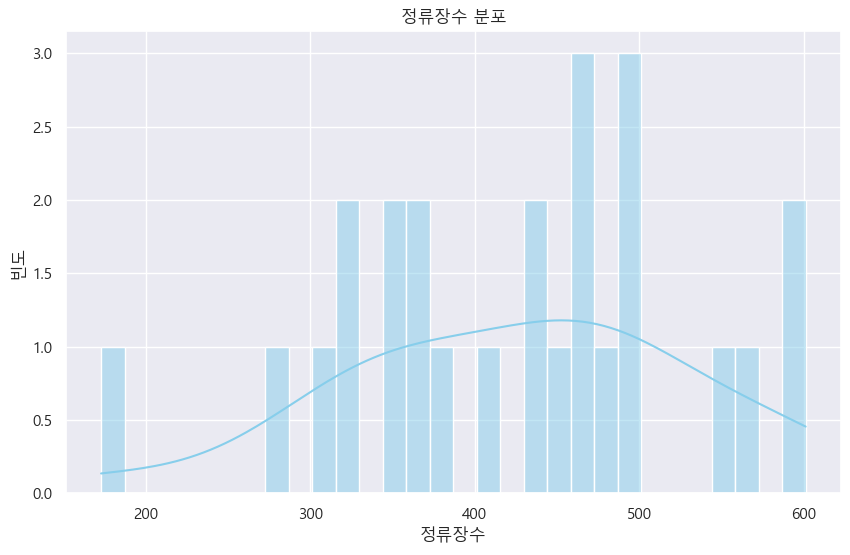

In [51]:
# 정류장 수 변수의 분포를 히스토그램과 KDE 그래프로 나타내기
plt.figure(figsize=(10, 6))
sns.histplot(df['정류장수'], bins=30, kde=True, color='skyblue')
plt.title('정류장수 분포')
plt.xlabel('정류장수')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

In [52]:
df[df['정류장수']<200]

,도착 시군구 코드,자치구,남자,여자,합계,세대당인구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
1,11020,중구,63495,68298,131793,1.87,235,"6,414","3,542",982,...,173,102,3138112,3050645,113.69971,110.530616,58.1978,47.183639,26065980,21132891.17


### 3) 총 이동 인구수

In [53]:
df['총 이동인구'].describe()

count    2.500000e+01
mean     2.021983e+07
std      8.420304e+06
min      8.554932e+06
25%      1.571327e+07
50%      1.766824e+07
75%      2.243565e+07
max      4.847889e+07
Name: 총 이동인구, dtype: float64

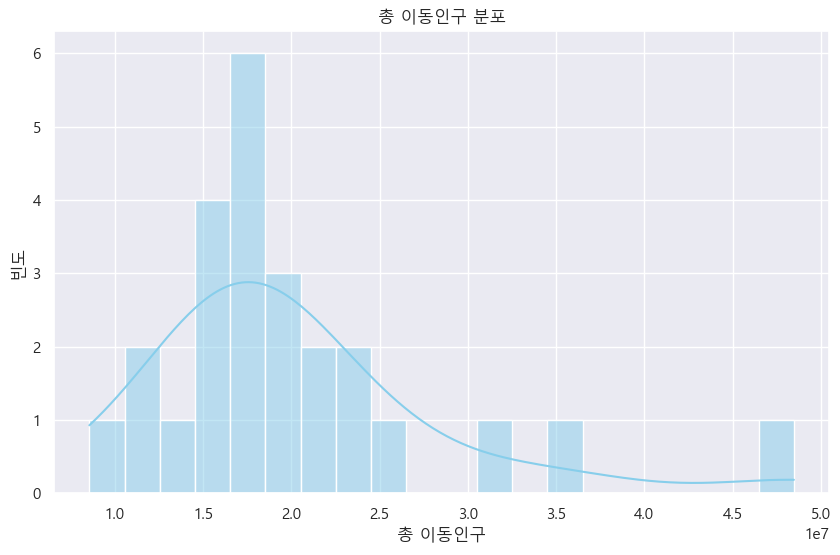

In [54]:
# 총 이동인구수의 분포를 히스토그램과 KDE 그래프로 나타내기
plt.figure(figsize=(10, 6))
sns.histplot(df['총 이동인구'], bins=20, kde=True, color='skyblue')
plt.title('총 이동인구 분포')
plt.xlabel('총 이동인구')
plt.ylabel('빈도')
plt.grid(True)
plt.show()


In [55]:
df[df['총 이동인구']>30000000]

,도착 시군구 코드,자치구,남자,여자,합계,세대당인구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
21,11220,서초구,196391,215687,412078,2.40,903,"6,712","3,897","1,255",...,601,99,5919552,5755058,113.621221,110.463886,63.696408,68.428545,29053970,31212449.29
22,11230,강남구,262991,287291,550282,2.27,"2,517","11,486","7,273","2,528",...,501,98,6960336,6597087,123.257234,116.824633,65.514763,96.164419,33027630,48478887.79
23,11240,송파구,316981,343044,660025,2.29,"4,850","5,760","3,372","1,469",...,470,60,4746623,4744766,99.003483,98.964751,71.047844,85.713394,29867306,36032453.85


### 4) 파생변수 인구 대비 이동인구 비율

* 인구 대비 이동인구의 비율을 나타냄 : 이동인구 / (남 + 여)
* 총이동인구가 누적이기 때문에 이동인구 > 남 + 여 인 경우 25건 -> 포함하여 분석
* nan값 없음
* 종로구 134 중구 164 유독 높음

In [56]:
df['인구대비이동인구_비율'] = df['총 이동인구']/(df['남자']+df['여자'])

In [57]:
df[df['인구대비이동인구_비율']>120]

,도착 시군구 코드,자치구,남자,여자,합계,세대당인구,택시운송업.1,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,...,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,인구대비이동인구_비율
0,11010,종로구,71890,78563,150453,1.93,215,"5,912","3,613","1,413",...,105,4500874,4348356,123.298104,119.119987,59.819645,44.694476,26504649,19803049.50,131.622829
1,11020,중구,63495,68298,131793,1.87,235,"6,414","3,542",982,...,102,3138112,3050645,113.699710,110.530616,58.197800,47.183639,26065980,21132891.17,160.349117


In [58]:
df['인구대비이동인구_비율'].describe()

count     25.000000
mean      57.179524
std       30.426420
min       34.529270
25%       38.539698
50%       46.866564
75%       64.371972
max      160.349117
Name: 인구대비이동인구_비율, dtype: float64

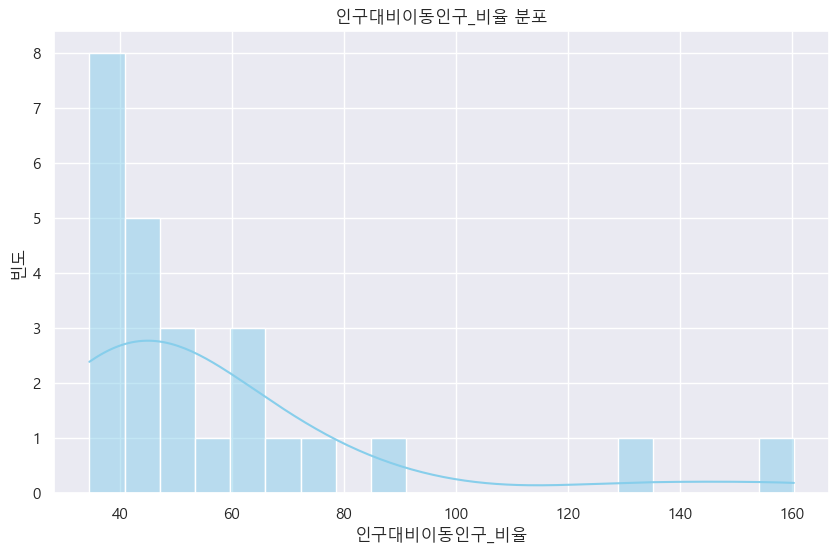

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['인구대비이동인구_비율'], bins=20, kde=True, color='skyblue')
plt.title('인구대비이동인구_비율 분포')
plt.xlabel('인구대비이동인구_비율')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


### 1) X: 업종별(학원) -> Y: 정류장수

In [60]:
target = '정류장수'
feature = '일반 교과 학원.1'

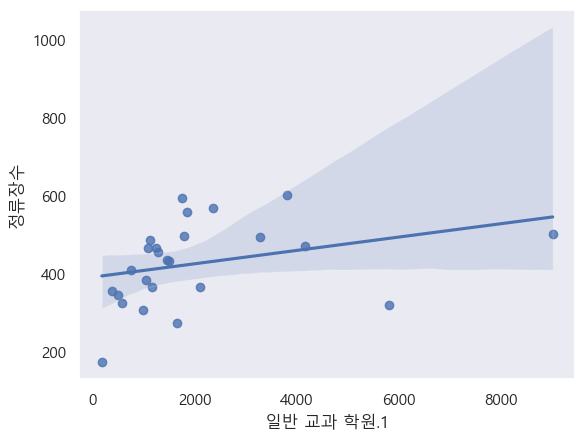

In [61]:
fig, ax = plt.subplots()
sns.regplot( x = '일반 교과 학원.1', y = '정류장수',data = df, ax =ax)
ax.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

In [62]:
#수치화 상관분석
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df[feature], df[target])
print(correlation, p_value)

0.317300469210924 0.12221794393316714


### 2) X: 세대당 인구 -> Y: 승차 총 승객 수

In [63]:
target = '세대당인구'
feature = '승차총승객수'

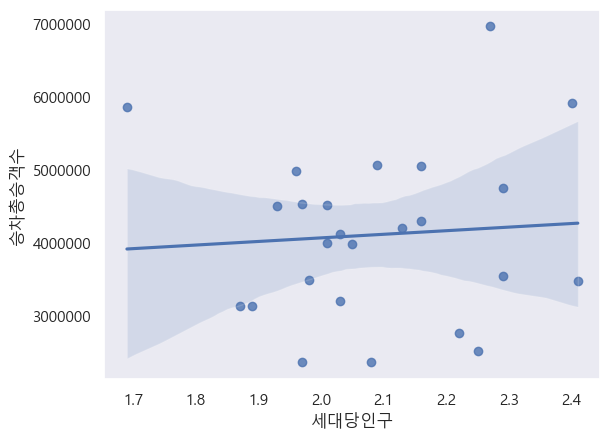

In [64]:
fig, ax = plt.subplots()
sns.regplot(x= '세대당인구',y = '승차총승객수',data = df, ax = ax)
ax.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

In [65]:
#수치화 상관분석
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df[feature], df[target])
print(correlation, p_value)

0.07319909792630258 0.7280468200335705


### 3) X: 인구대비 이동인구 비율 -> Y: 노선 수

In [66]:
target = '노선수'
feature = '인구대비이동인구_비율'

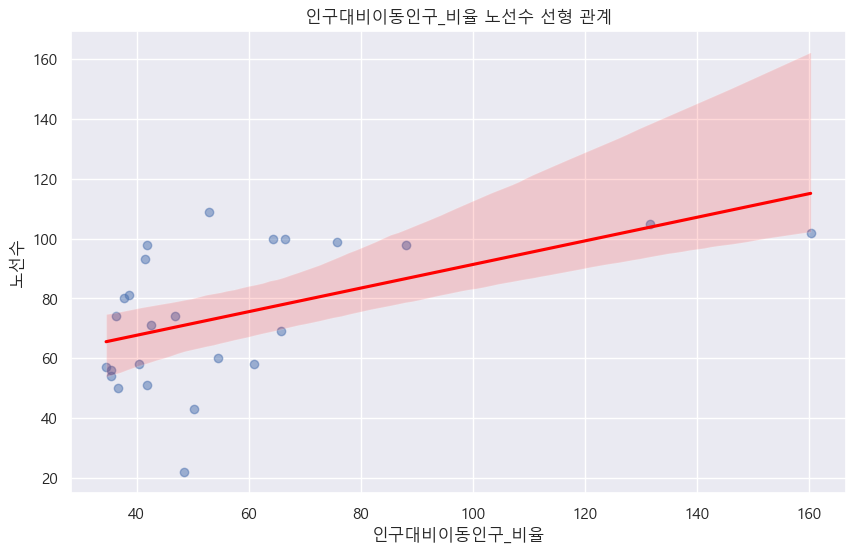

In [67]:
#시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
sns.regplot(x=feature, y=target, data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('인구대비이동인구_비율 노선수 선형 관계')  # 그래프 제목
plt.xlabel('인구대비이동인구_비율')  # x축 라벨
plt.ylabel('노선수')  # y축 라벨
plt.grid(True)  # 격자 표시
plt.show()

In [68]:
#수치화 상관분석
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df[feature], df[target])
print(correlation, p_value)

0.5130996142086113 0.008715954261159497


### 4) X: 정류장 수 -> Y: 노선 수

In [69]:
target = '노선수'
feature = '정류장수'

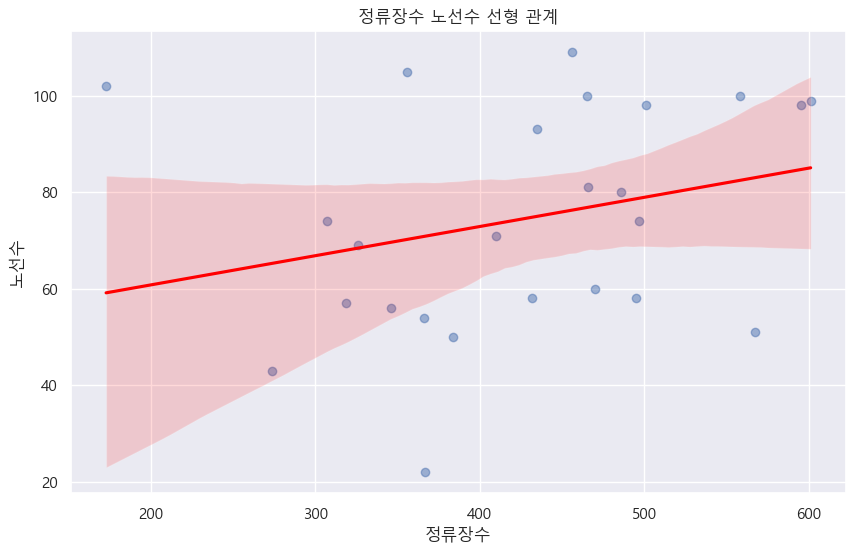

In [70]:
#시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
sns.regplot(x=feature, y=target, data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('정류장수 노선수 선형 관계')  # 그래프 제목
plt.xlabel('정류장수')  # x축 라벨
plt.ylabel('노선수')  # y축 라벨
plt.grid(True)  # 격자 표시
plt.show()

In [71]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df[feature], df[target])
print(correlation, p_value)

0.2723983334002758 0.18772533029186592


### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [72]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

display(spst.pearsonr(df['노선수'],df['총 이동인구']))
display(spst.pearsonr(df['정류장수'],df['승차총승객수']))
display(spst.pearsonr(df['정류장수'],df['노선수']))
display(spst.pearsonr(df['일반 교과 학원.1'],df['승차총승객수']))
display(spst.pearsonr(df['세대당인구'],df['승차총승객수']))
display(spst.pearsonr(df['일반 교과 학원.1'],df['정류장수']))
display(spst.pearsonr(df['인구대비이동인구_비율'],df['노선수']))

PearsonRResult(statistic=0.2842787773745361, pvalue=0.16843961433392848)

PearsonRResult(statistic=0.5860112764394702, pvalue=0.002082561681352025)

PearsonRResult(statistic=0.2723983334002758, pvalue=0.18772533029186592)

PearsonRResult(statistic=0.45579892123581606, pvalue=0.02203037417044659)

PearsonRResult(statistic=0.07319909792630258, pvalue=0.7280468200335705)

PearsonRResult(statistic=0.317300469210924, pvalue=0.12221794393316714)

PearsonRResult(statistic=0.5130996142086113, pvalue=0.008715954261159497)

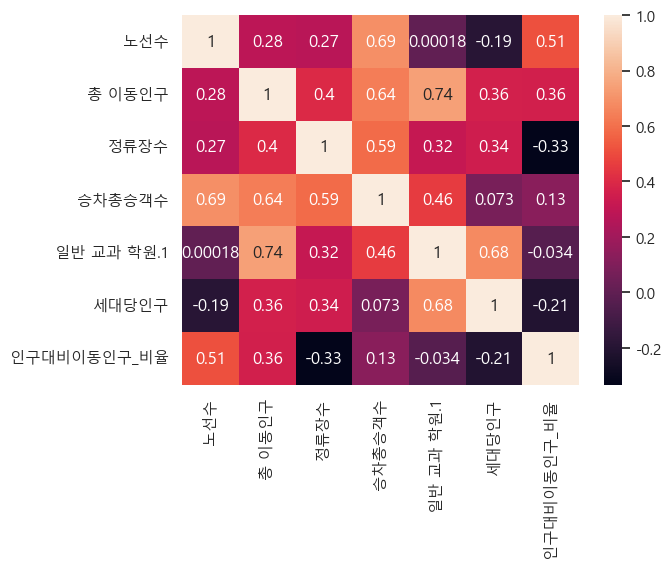

In [73]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(df[['노선수','총 이동인구','정류장수','승차총승객수','일반 교과 학원.1','세대당인구','인구대비이동인구_비율']].corr(), annot = True)
plt.show()

In [74]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 학원가에는 정류장 수가 많을 것이라고 생각하였지만, 관계가 있지만, 강한 관계를 가지지 않는다. 
# 2. 정류장 수와 노선 수는 비례 관계가 있을 것이라 생각하였지만, 서로 강한 관계를 가지지 않는다.
# 3. 인구 대비 이동인구의 비율과 노선 수는 관계가 있으며, 서로 강한 관계를 갖는다.

## 4.관계 정리

### 1) 강한 관계의 변수

-  인구 대비 이동인구의 비율

### 2) 약한 관계의 변수

- 정류장 수, 업종별(학원)

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

관계들을 정리하여 보았을 때, 인구 대비 이동 인구와 노선수의 비율 계산해보면 성북구, 동작구, 구로구 의 순서로 나온 것을 확인할 수 있다. 인구 대비 이동 인구 수가 많다는 것은 외부 지역에서 유입이 많다는 것을 의미한다. 이는 노선의 밀집도가 높다는 것이므로, 밀집된 것을 해소하기 위하여 노선의 추가 증설이 필요하다. 